In [1]:
import pandas as pd # import pandas balíku
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split # import funckie na rozdelenia dat


df = pd.read_csv('housepricedata.csv') # nacitanie datasetu 

dataset = df.values # prevedenie dat do pola 


In [2]:
# rozdelenie udajov na vstupne X a Y ktore chceme predpovedat
X = dataset[:,0:10] # vsetko pred ciarkou ukazuje na riadky pola a za ciarkou na stlpce, vytiahnutie prvych 10 stlpcov do X 
Y = dataset[:,10] # posledny stlpec do Y

min_max_scaler = preprocessing.MinMaxScaler() #  uprava mnoziny udajov tak aby vstupne funkcie boli 0 alebo 1 
X_scale = min_max_scaler.fit_transform(X) # uprava a ulozenie dat do premennej
X_scale


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [3]:
# rozdelenie na treningove a testovacie data 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3) # val_and_test bude 30% z objemu dat a uloží vybrané data do 4 premnnych 
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) # rozdelenie val_and_test rovnako na validacny a testovaci subor 

In [4]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape) # vypis rozmerov premennych, celkovo ich mame 6, 
#treningova suprava ma 1022 datovych bodov, zatial co validacna a testovacia sada ma 219 datovych bodov
#Premenne X maju 10 vstupnych funkcii, zatial co premenne Y maju iba jednu funkciu na predpovedanie

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [5]:
# import kerasu
from keras.models import Sequential 
from keras.layers import Dense

Using TensorFlow backend.


In [6]:
# urcili sme si aku chcem pouzit architektúru neuronovej siete a v tejto casti sme si zadefinovali architekturu 
model = Sequential([ # ulozenie modelu do premennej 
    Dense(32, activation='relu', input_shape=(10,)), # prva vrstva je tvorena s 32 neuronmi a vstupny tvar je 10 pretoze mame 10 vstupnych funkcii, aktivícia je relu
    Dense(32, activation='relu'), # druha vrsta ma tak isto 32 neuronov akurat nemusime definovat vstupne funkcie pretoze keras si to odvodi z prvej vrstvy
    Dense(1, activation='sigmoid'), # vrstva je tvorena jednym neuronov a aktivacia je sigmoid
])

In [7]:
model.compile(optimizer='sgd', # 'sgd' oznacuje stochasticky gradient zostupu 
              loss='binary_crossentropy',  # stratova funkcia pre výstupy, ktore maju hodnoty 1 alebo 0
              metrics=['accuracy']) # sledovanie prsesnosti

hist = model.fit(X_train, Y_train, # funkcia fit prisposobuje parametre udajom, musime specifikovat na akych udajoch trenujeme, co je X_train, Y_train
          batch_size=32, epochs=100, # specifikujeme velkost batch a ako dlho ju chceme trenovat
          validation_data=(X_val, Y_val)) # specifikujeme validacne udaje, tato funkcia nam vypise historiu ktoru vlozime do premennej hist., tuto premennu pouzijeme o nieco neskor 
# po spustení vidíme ako nas model trenuje 


Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 1s 529us/step - loss: 0.7522 - acc: 0.4951 - val_loss: 0.7443 - val_acc: 0.4977
Epoch 2/100
1022/1022 [==============================] - 0s 55us/step - loss: 0.7301 - acc: 0.4941 - val_loss: 0.7249 - val_acc: 0.4977
Epoch 3/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.7153 - acc: 0.4863 - val_loss: 0.7127 - val_acc: 0.4840
Epoch 4/100
1022/1022 [==============================] - 0s 53us/step - loss: 0.7068 - acc: 0.4364 - val_loss: 0.7051 - val_acc: 0.4247
Epoch 5/100
1022/1022 [==============================] - 0s 46us/step - loss: 0.7010 - acc: 0.3904 - val_loss: 0.6995 - val_acc: 0.3699
Epoch 6/100
1022/1022 [==============================] - 0s 52us/step - loss: 0.6962 - acc: 0.4305 - val_loss: 0.6943 - val_acc: 0.4658
Epoch 7/100
1022/1022 [==============================] - 0s 70us/step - loss: 0.6915 - acc: 0.5440 - val_loss: 0.6891 - val_acc: 0.6301


In [8]:
  model.evaluate(X_test, Y_test)[1] #  zistenie presnosti, na konci je premenna 1 pretoze na index 0 je indexovana stratovost a presnost  je na indexe 1 


219/219 [==============================] - 0s 60us/step


0.8858447523966227

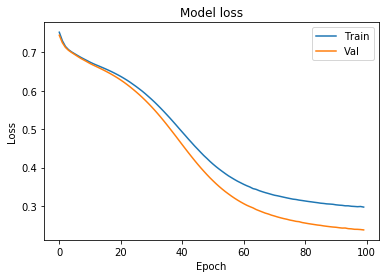

In [11]:
import matplotlib.pyplot as plt # import baliku pre vizualizaciu 

plt.plot(hist.history['loss']) # vykreslenie loss
plt.plot(hist.history['val_loss']) # vykreslenie val_loss
plt.title('Model loss') # nazov grafu
plt.ylabel('Loss') # oznacenie osi y
plt.xlabel('Epoch') # oznacenie osi x
plt.legend(['Train', 'Val'], loc='upper right') # legenda grafu a miesto umiestnenia 
plt.show()

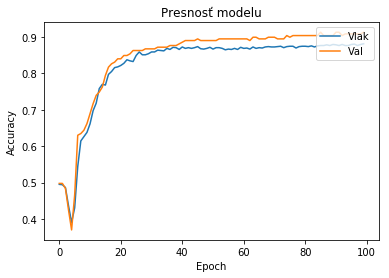

In [10]:
# graf porovnavajuci presnost a presnost overenia
plt.plot (hist.history ['acc']) 
plt.plot (hist.history ['val_acc']) 
plt.title ('Presnosť modelu') 
plt.ylabel ('Accuracy') 
plt.xlabel ('Epoch' ) 
plt.legend (['Vlak', 'Val'], loc = 'upper right') 
plt.show ()